In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse
import matplotlib
# 패키지 불러오기
from sklearn.linear_model import Ridge, Lasso, ElasticNet
#from sklearn.tree import export_graphviz  환경 설정하기 어려움
#import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# 나무 구조 시각화  
from sklearn.tree import plot_tree
# 예측 / 회귀 random forest
from sklearn.ensemble import RandomForestRegressor
matplotlib.rc('font', family = 'Malgun Gothic') 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import scale, minmax_scale, robust_scale

#평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)
matplotlib.rc('font', family = 'Malgun Gothic') 

from scipy.stats import chi2_contingency
from scipy import stats

# 로지스틱 회귀
from statsmodels.api import Logit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [145]:
df_raw = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/SCALE불량.CSV",encoding='euc-kr')
df_raw

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PB563502,2008-08-02:13:35:36,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,...,1172,72,1164,62,245,1155,1005,적용,8,2조
716,PB563503,2008-08-02:13:35:02,양품,NV-A32,C0,15.08,3212,48233,18340,2호기,...,1150,61,1169,61,238,1160,947,적용,10,1조
717,PB563504,2008-08-02:14:40:00,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,...,1169,65,1163,77,247,1152,948,적용,10,4조
718,PB563505,2008-08-02:13:35:19,양품,LR-A,C0,15.59,3363,48740,80240,3호기,...,1179,86,1163,45,243,1154,940,적용,10,2조


# 데이터 전처리

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLATE_NO           720 non-null    object 
 1   ROLLING_DATE       720 non-null    object 
 2   SCALE              720 non-null    object 
 3   SPEC               720 non-null    object 
 4   STEEL_KIND         720 non-null    object 
 5   PT_THK             720 non-null    float64
 6   PT_WDTH            720 non-null    int64  
 7   PT_LTH             720 non-null    int64  
 8   PT_WGT             720 non-null    int64  
 9   FUR_NO             720 non-null    object 
 10  FUR_NO_ROW         720 non-null    int64  
 11  FUR_HZ_TEMP        720 non-null    int64  
 12  FUR_HZ_TIME        720 non-null    int64  
 13  FUR_SZ_TEMP        720 non-null    int64  
 14  FUR_SZ_TIME        720 non-null    int64  
 15  FUR_TIME           720 non-null    int64  
 16  FUR_EXTEMP         720 non

In [8]:
df_raw.isnull().sum()

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

결측치가 없음을 확인

In [9]:
df_raw.shape

(720, 21)

In [4]:
df_raw.drop(['PLATE_NO', 'ROLLING_DATE'], axis = 1, inplace=True)

# plate no 와 작업시각은 제외시킨다.

In [13]:
df_raw.head()

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1125,934,적용,8,2조
1,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,1120,937,적용,8,2조
2,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,1106,889,적용,8,3조
3,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,1113,885,적용,8,3조
4,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,1118,873,적용,8,1조


In [5]:
df_raw['SCALE'] = np.where(df_raw['SCALE']=='불량', 1, 0)

# 불량 1  양품 0 

In [15]:
df_raw.head()

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1125,934,적용,8,2조
1,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,1120,937,적용,8,2조
2,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,1106,889,적용,8,3조
3,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,1113,885,적용,8,3조
4,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,1118,873,적용,8,1조


In [16]:
df_raw.describe()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,0.320833,29.267857,2807.127778,34323.269444,41481.777778,1.497222,1155.338889,88.204167,1149.666667,75.330556,300.563889,1139.570833,933.920833,8.319444
std,0.467121,19.152651,517.839690,13828.434837,24751.322015,0.500340,20.866398,36.248696,17.571788,26.086390,45.390303,17.857121,107.863887,1.623252
min,0.000000,12.030000,1800.000000,7893.000000,7820.000000,1.000000,1103.000000,43.000000,1113.000000,35.000000,221.000000,1102.000000,0.000000,5.000000
25%,0.000000,16.090000,2466.000000,22663.000000,17757.500000,1.000000,1139.000000,65.000000,1132.000000,57.750000,257.000000,1122.750000,889.750000,6.000000
50%,0.000000,20.130000,2725.000000,37380.000000,36120.000000,1.000000,1158.000000,75.000000,1155.000000,67.500000,304.000000,1144.000000,951.000000,8.000000
75%,1.000000,40.000000,3125.000000,43735.000000,61120.000000,2.000000,1171.000000,101.000000,1164.000000,85.250000,342.000000,1154.000000,994.250000,10.000000
max,1.000000,100.340000,4575.000000,54917.000000,115080.000000,2.000000,1206.000000,251.000000,1185.000000,194.000000,398.000000,1175.000000,1078.000000,10.000000


ROLLING_TEMP_T5(압연온도)에서 이상치가 발견됐다 최소값이 0으로 찍힌다.

In [163]:
df_raw.loc[df_raw['ROLLING_TEMP_T5'] ==0]

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
41,0,GL-E36-TM,T8,55.51,3765,11398,37400,3호기,2,1132,95,1128,80,341,1123,0,적용,6,1조
184,0,JS-SM490YB,C0,16.09,2221,43596,61150,3호기,1,1169,64,1164,61,308,1155,0,적용,10,3조
185,0,JS-SM490YB,C0,16.09,2221,43596,61150,3호기,2,1163,57,1166,67,303,1158,0,적용,10,4조
494,0,PILAC-BT33,T5,80.82,2085,12919,17090,2호기,1,1133,89,1122,59,378,1112,0,적용,6,2조
495,0,PILAC-BT33,T5,80.82,2085,13176,17430,1호기,2,1130,92,1124,61,362,1116,0,적용,6,3조
496,0,NV-D32-TM,T0,40.35,2497,23592,37320,3호기,1,1119,109,1117,76,383,1107,0,적용,6,3조


총 6개가 ROLLING_TEMP_T5가 0으로 찍힘. 데이터가 적을때는 쉽게 제거하면 안된다고 생각하여 평균값으로 채워주겠다

In [6]:
Rolling_mean =df_raw['ROLLING_TEMP_T5'].agg('mean')

In [7]:
df_raw['ROLLING_TEMP_T5'][df_raw.ROLLING_TEMP_T5.values ==0] = Rolling_mean

<ipython-input-7-3b1a3661980a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['ROLLING_TEMP_T5'][df_raw.ROLLING_TEMP_T5.values ==0] = Rolling_mean


In [32]:
df_raw.describe()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,0.320833,29.267857,2807.127778,34323.269444,41481.777778,1.497222,1155.338889,88.204167,1149.666667,75.330556,300.563889,1139.570833,941.703507,8.319444
std,0.467121,19.152651,517.839690,13828.434837,24751.322015,0.500340,20.866398,36.248696,17.571788,26.086390,45.390303,17.857121,65.539712,1.623252
min,0.000000,12.030000,1800.000000,7893.000000,7820.000000,1.000000,1103.000000,43.000000,1113.000000,35.000000,221.000000,1102.000000,723.000000,5.000000
25%,0.000000,16.090000,2466.000000,22663.000000,17757.500000,1.000000,1139.000000,65.000000,1132.000000,57.750000,257.000000,1122.750000,891.750000,6.000000
50%,0.000000,20.130000,2725.000000,37380.000000,36120.000000,1.000000,1158.000000,75.000000,1155.000000,67.500000,304.000000,1144.000000,951.000000,8.000000
75%,1.000000,40.000000,3125.000000,43735.000000,61120.000000,2.000000,1171.000000,101.000000,1164.000000,85.250000,342.000000,1154.000000,994.250000,10.000000
max,1.000000,100.340000,4575.000000,54917.000000,115080.000000,2.000000,1206.000000,251.000000,1185.000000,194.000000,398.000000,1175.000000,1078.000000,10.000000


In [8]:
df_raw.loc[df_raw['ROLLING_TEMP_T5'] ==Rolling_mean]

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
41,0,GL-E36-TM,T8,55.51,3765,11398,37400,3호기,2,1132,95,1128,80,341,1123,933.920833,적용,6,1조
184,0,JS-SM490YB,C0,16.09,2221,43596,61150,3호기,1,1169,64,1164,61,308,1155,933.920833,적용,10,3조
185,0,JS-SM490YB,C0,16.09,2221,43596,61150,3호기,2,1163,57,1166,67,303,1158,933.920833,적용,10,4조
494,0,PILAC-BT33,T5,80.82,2085,12919,17090,2호기,1,1133,89,1122,59,378,1112,933.920833,적용,6,2조
495,0,PILAC-BT33,T5,80.82,2085,13176,17430,1호기,2,1130,92,1124,61,362,1116,933.920833,적용,6,3조
496,0,NV-D32-TM,T0,40.35,2497,23592,37320,3호기,1,1119,109,1117,76,383,1107,933.920833,적용,6,3조


잘 채워줬음을 확인.

<AxesSubplot:>

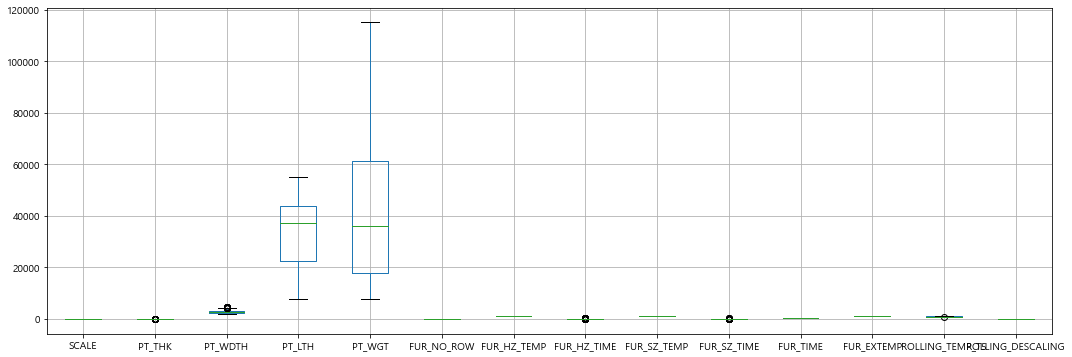

In [143]:
df_raw.boxplot(figsize= (18,6))

# 이상치가 보이는 것같은 변수들을 따로 뽑아서 확인

<AxesSubplot:>

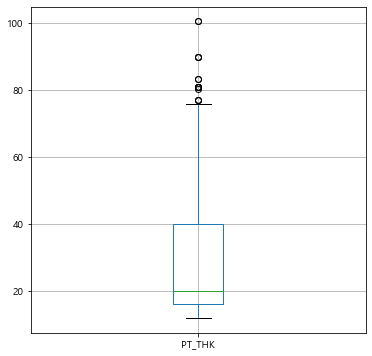

In [70]:
df_raw.boxplot('PT_THK',figsize= (6,6))

# 두께가 100mm 이상인 극후판 존재

<AxesSubplot:>

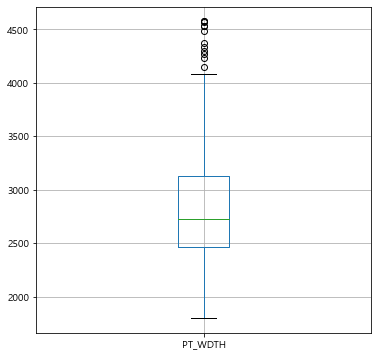

In [71]:
df_raw.boxplot('PT_WDTH',figsize= (6,6))

<AxesSubplot:>

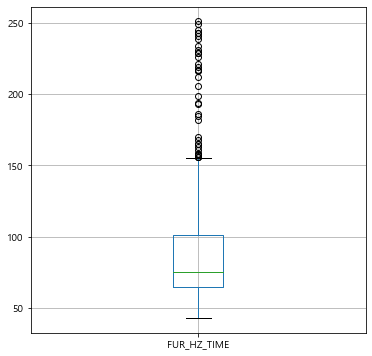

In [75]:
df_raw.boxplot('FUR_HZ_TIME',figsize= (6,6))

<AxesSubplot:>

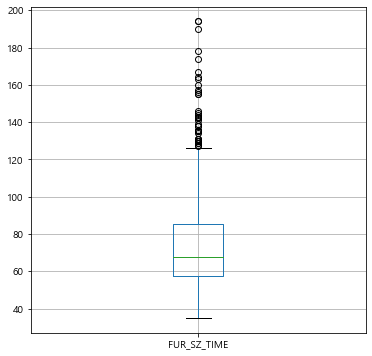

In [77]:
df_raw.boxplot('FUR_SZ_TIME',figsize= (6,6))

# 탐색적 분석

<AxesSubplot:xlabel='SCALE', ylabel='count'>

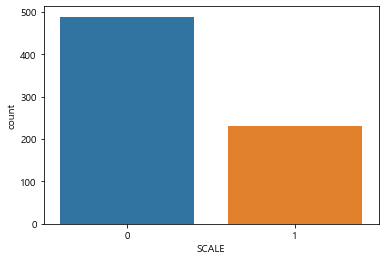

In [40]:
sns.countplot(df_raw['SCALE'])

불량과 양품의 개수 차이 - 0이 양품 / 1이 불량

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HSB', ylabel='count'>

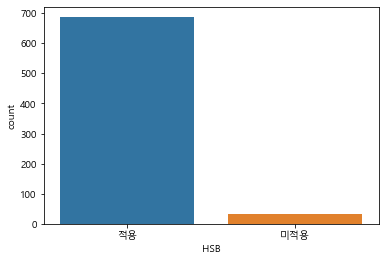

In [41]:
sns.countplot(df_raw['HSB'])

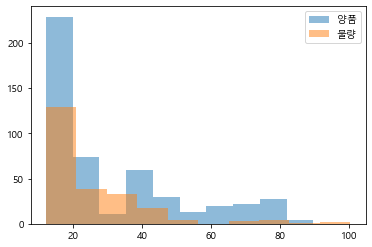

In [49]:
plt.hist(df_raw[df_raw['SCALE']==0]['PT_THK'], label='양품', alpha= 0.5)
plt.hist(df_raw[df_raw['SCALE']==1]['PT_THK'], label='불량',alpha= 0.5)
plt.legend()

# plate 두께가 작을 수록 양품과 불량이 높다.

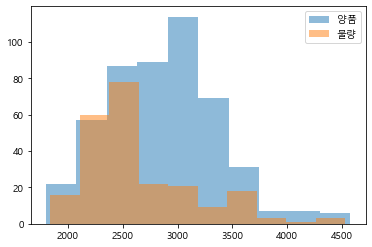

In [50]:
plt.hist(df_raw[df_raw['SCALE']==0]['PT_WDTH'], label='양품', alpha= 0.5)
plt.hist(df_raw[df_raw['SCALE']==1]['PT_WDTH'], label='불량',alpha= 0.5)
plt.legend()

#plate의 폭이 작을수록 불량이 높다

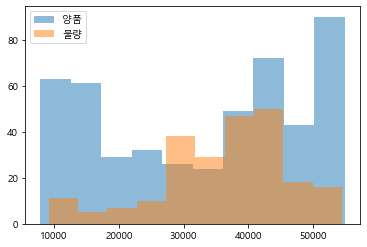

In [51]:
plt.hist(df_raw[df_raw['SCALE']==0]['PT_LTH'], label='양품', alpha= 0.5)
plt.hist(df_raw[df_raw['SCALE']==1]['PT_LTH'], label='불량',alpha= 0.5)
plt.legend()

# plate의 길이가 40000인곳의 불량이 높다

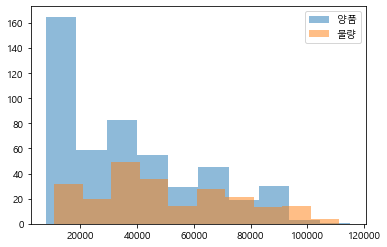

In [58]:
plt.hist(df_raw[df_raw['SCALE']==0]['PT_WGT'], label='양품', alpha= 0.5)
plt.hist(df_raw[df_raw['SCALE']==1]['PT_WGT'], label='불량',alpha= 0.5)
plt.legend()


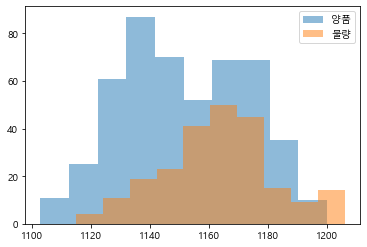

In [53]:
plt.hist(df_raw[df_raw['SCALE']==0]['FUR_HZ_TEMP'], label='양품', alpha= 0.5)
plt.hist(df_raw[df_raw['SCALE']==1]['FUR_HZ_TEMP'], label='불량',alpha= 0.5)
plt.legend()


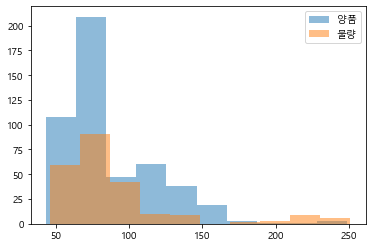

In [54]:
plt.hist(df_raw[df_raw['SCALE']==0]['FUR_HZ_TIME'], label='양품', alpha= 0.5)
plt.hist(df_raw[df_raw['SCALE']==1]['FUR_HZ_TIME'], label='불량',alpha= 0.5)
plt.legend()

# 가열대의 시간이 짧을수록 불량이 높다.

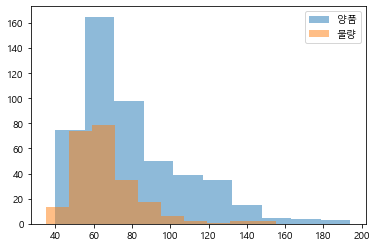

In [55]:
plt.hist(df_raw[df_raw['SCALE']==0]['FUR_SZ_TIME'], label='양품', alpha= 0.5)
plt.hist(df_raw[df_raw['SCALE']==1]['FUR_SZ_TIME'], label='불량',alpha= 0.5)
plt.legend()

# 균열대의 시간이 짧을수록 불량이 높다

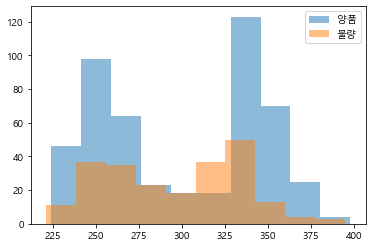

In [56]:
plt.hist(df_raw[df_raw['SCALE']==0]['FUR_TIME'], label='양품', alpha= 0.5)
plt.hist(df_raw[df_raw['SCALE']==1]['FUR_TIME'], label='불량',alpha= 0.5)
plt.legend()

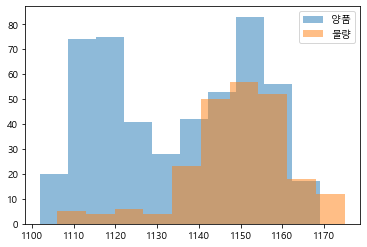

In [57]:
plt.hist(df_raw[df_raw['SCALE']==0]['FUR_EXTEMP'], label='양품', alpha= 0.5)
plt.hist(df_raw[df_raw['SCALE']==1]['FUR_EXTEMP'], label='불량',alpha= 0.5)
plt.legend()

# 특정한 추출온도에서 불량률이 높다.

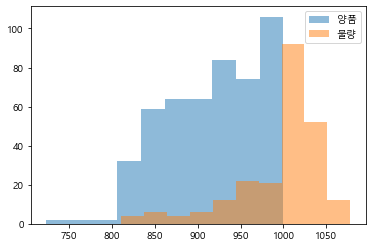

In [59]:
plt.hist(df_raw[df_raw['SCALE']==0]['ROLLING_TEMP_T5'], label='양품', alpha= 0.5)
plt.hist(df_raw[df_raw['SCALE']==1]['ROLLING_TEMP_T5'], label='불량',alpha= 0.5)
plt.legend()

# 압연온도가 매우 높으면 불량이 높다.

In [64]:
pd.crosstab(index = df_raw['SCALE'], columns=df_raw['SPEC'] )

#제품구격별 양품수와 불량의 수
# 제품 구격별로 큰 영향을 줄것으로 보이지는 않는다. 

SPEC,A131-DH36TM,A283-C,A516-60,A709-36,AB/A,AB/AH32,AB/B,AB/EH32-TM,AB/EH36-TM,API-2W-50T,...,NV-A32-TM,NV-A36-TM,NV-B,NV-D32-TM,NV-D36-TM,NV-E32-TM,NV-E36-TM,PILAC-BT33,SA283-C,V42JBN3
SCALE,,,,,,,,,,,,,,,,,,,,,
0,0,1,1,1,3,4,3,2,16,2,...,2,2,1,4,4,2,5,38,11,3
1,1,5,1,0,4,1,3,0,1,0,...,1,0,2,0,1,0,0,2,10,1


In [65]:
pd.crosstab(index = df_raw['SCALE'], columns=df_raw['STEEL_KIND'] )

# 강종별 양품과 불량의 수
# C0이 양품과 불량수 모두 가장 많고 C1은 불량제품 한개만 있다. T3는 양품만 있다.

STEEL_KIND,C0,C1,C3,T0,T1,T3,T5,T7,T8
SCALE,,,,,,,,,
0,291,0,6,14,16,2,41,29,90
1,212,1,1,2,2,0,2,6,5


In [66]:
pd.crosstab(index = df_raw['SCALE'], columns=df_raw['FUR_NO'] )

# 호기 별로 양품 불량의 수가 비슷하다.
# 큰 영향을 끼치지는 않을 것으로 추측된다.

FUR_NO,1호기,2호기,3호기
SCALE,,,
0,167,167,155
1,73,70,88


In [67]:
pd.crosstab(index = df_raw['SCALE'], columns=df_raw['HSB'] )

# HSB과정은 미적용하면 불량이다. 물론 적용시에도 불량이 나온다.

HSB,미적용,적용
SCALE,,
0,0,489
1,33,198


In [68]:
pd.crosstab(index = df_raw['SCALE'], columns=df_raw['WORK_GR'] )

# 조별로 불량 양품의 수가 비슷하다. 큰 영향을 끼치지는 않을 것으로 추측된다.

WORK_GR,1조,2조,3조,4조
SCALE,,,,
0,122,120,118,129
1,67,45,54,65


In [147]:
pd.crosstab(index = df_raw['SCALE'], columns=df_raw['FUR_NO_ROW'] )

FUR_NO_ROW,1,2
SCALE,,
불량,120,111
양품,242,247


In [82]:
df_raw.corr()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
SCALE,1.000000,-0.124858,-0.206021,0.100475,0.218741,-0.022960,0.247670,0.064466,0.374809,-0.255138,-0.049214,0.374679,0.551898,-0.006955
PT_THK,-0.124858,1.000000,-0.313151,-0.862618,-0.397391,-0.002530,-0.523926,0.171835,-0.694770,0.269365,0.413009,-0.687565,-0.497441,-0.836631
PT_WDTH,-0.206021,-0.313151,1.000000,0.119726,0.031009,0.006727,0.180024,-0.126002,0.227296,-0.051361,-0.393200,0.216078,-0.111239,0.337540
PT_LTH,0.100475,-0.862618,0.119726,1.000000,0.451815,-0.021185,0.473111,-0.090338,0.645402,-0.230159,-0.251950,0.641330,0.432096,0.809280
PT_WGT,0.218741,-0.397391,0.031009,0.451815,1.000000,-0.022241,0.153331,0.007292,0.359513,-0.193112,-0.057776,0.361377,0.419302,0.238986
FUR_NO_ROW,-0.022960,-0.002530,0.006727,-0.021185,-0.022241,1.000000,0.004753,-0.007522,0.009228,0.062408,0.016053,0.013799,-0.006536,0.018219
FUR_HZ_TEMP,0.247670,-0.523926,0.180024,0.473111,0.153331,0.004753,1.000000,-0.112438,0.772907,-0.327912,-0.348223,0.758185,0.354927,0.470899
FUR_HZ_TIME,0.064466,0.171835,-0.126002,-0.090338,0.007292,-0.007522,-0.112438,1.000000,-0.210175,0.067994,0.483407,-0.196404,0.004005,-0.152363
FUR_SZ_TEMP,0.374809,-0.694770,0.227296,0.645402,0.359513,0.009228,0.772907,-0.210175,1.000000,-0.566177,-0.477177,0.985245,0.657534,0.648646
FUR_SZ_TIME,-0.255138,0.269365,-0.051361,-0.230159,-0.193112,0.062408,-0.327912,0.067994,-0.566177,1.000000,0.490728,-0.565912,-0.478913,-0.285524


<AxesSubplot:>

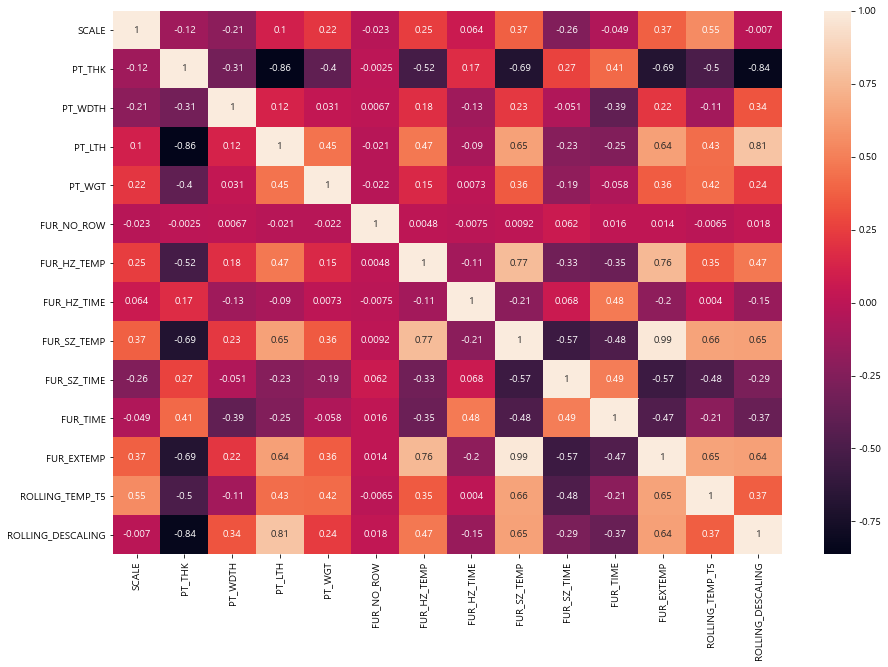

In [87]:
plt.figure(figsize = (15,10))
sns.heatmap(df_raw.corr(), annot = True)

FUR_SZ_TEMP, FUR_EXTEMP, ROLLING_TEMP_T5 가 SCALE과 상관관계가 높아보인다. 특히  ROLLING_TEMP_T5는 강한 양의 상관관계가 보인다.

# 가설검정 - 카이제곱 검정

In [98]:
# SEPC
sepc = pd.crosstab(index = df_raw['SCALE'], columns=df_raw['SPEC'] )

In [99]:
sepc

SPEC,A131-DH36TM,A283-C,A516-60,A709-36,AB/A,AB/AH32,AB/B,AB/EH32-TM,AB/EH36-TM,API-2W-50T,...,NV-A32-TM,NV-A36-TM,NV-B,NV-D32-TM,NV-D36-TM,NV-E32-TM,NV-E36-TM,PILAC-BT33,SA283-C,V42JBN3
SCALE,,,,,,,,,,,,,,,,,,,,,
0,0,1,1,1,3,4,3,2,16,2,...,2,2,1,4,4,2,5,38,11,3
1,1,5,1,0,4,1,3,0,1,0,...,1,0,2,0,1,0,0,2,10,1


In [100]:
chi, pval, dof, expected = stats.chi2_contingency(sepc.T)
print('chi-square test')
print('chisq : {0:0.3f}'.format(chi))
print('p : {0:0.3f}'.format(pval))
print('degree f freedom : {}'.format(dof))
print('expected value : \n{}'.format(expected.round(3)))

chi-square test
chisq : 211.322
p : 0.000
degree f freedom : 65
expected value : 
[[ 0.679  0.321]
 [ 4.075  1.925]
 [ 1.358  0.642]
 [ 0.679  0.321]
 [ 4.754  2.246]
 [ 3.396  1.604]
 [ 4.075  1.925]
 [ 1.358  0.642]
 [11.546  5.454]
 [ 1.358  0.642]
 [ 0.679  0.321]
 [ 9.508  4.492]
 [ 2.038  0.962]
 [ 2.038  0.962]
 [ 0.679  0.321]
 [19.017  8.983]
 [ 0.679  0.321]
 [23.771 11.229]
 [ 0.679  0.321]
 [19.017  8.983]
 [ 2.038  0.962]
 [ 5.433  2.567]
 [ 2.717  1.283]
 [ 7.471  3.529]
 [ 5.433  2.567]
 [ 4.075  1.925]
 [10.867  5.133]
 [ 1.358  0.642]
 [ 3.396  1.604]
 [21.054  9.946]
 [ 3.396  1.604]
 [57.05  26.95 ]
 [12.904  6.096]
 [18.338  8.662]
 [ 2.038  0.962]
 [ 0.679  0.321]
 [ 1.358  0.642]
 [ 0.679  0.321]
 [ 2.717  1.283]
 [ 2.717  1.283]
 [ 3.396  1.604]
 [ 4.754  2.246]
 [ 3.396  1.604]
 [36.675 17.325]
 [22.412 10.588]
 [ 0.679  0.321]
 [ 0.679  0.321]
 [ 8.829  4.171]
 [ 0.679  0.321]
 [ 1.358  0.642]
 [ 3.396  1.604]
 [ 8.15   3.85 ]
 [ 0.679  0.321]
 [ 1.358  0.642]


p < 0.05 이므로 제품 규격별 차이가 있다고 볼 수 있다. -의미가 있다.

In [101]:
# STEEL_KIND
kind = pd.crosstab(index = df_raw['SCALE'], columns=df_raw['STEEL_KIND'] )

In [102]:
kind

STEEL_KIND,C0,C1,C3,T0,T1,T3,T5,T7,T8
SCALE,,,,,,,,,
0,291,0,6,14,16,2,41,29,90
1,212,1,1,2,2,0,2,6,5


In [103]:
chi, pval, dof, expected = stats.chi2_contingency(kind.T)
print('chi-square test')
print('chisq : {0:0.3f}'.format(chi))
print('p : {0:0.3f}'.format(pval))
print('degree f freedom : {}'.format(dof))
print('expected value : \n{}'.format(expected.round(3)))

chi-square test
chisq : 83.705
p : 0.000
degree f freedom : 8
expected value : 
[[3.41621e+02 1.61379e+02]
 [6.79000e-01 3.21000e-01]
 [4.75400e+00 2.24600e+00]
 [1.08670e+01 5.13300e+00]
 [1.22250e+01 5.77500e+00]
 [1.35800e+00 6.42000e-01]
 [2.92040e+01 1.37960e+01]
 [2.37710e+01 1.12290e+01]
 [6.45210e+01 3.04790e+01]]


p < 0.05 이므로 강종별 차이가 있다고 할 수 있다.

In [94]:
# SPEC
fur_no = pd.DataFrame(pd.crosstab(index = df_raw['SCALE'], columns=df_raw['FUR_NO'] ))

In [97]:
fur_no

FUR_NO,1호기,2호기,3호기
SCALE,,,
0,167,167,155
1,73,70,88


In [96]:
chi, pval, dof, expected = stats.chi2_contingency(fur_no.T)
print('chi-square test')
print('chisq : {0:0.3f}'.format(chi))
print('p : {0:0.3f}'.format(pval))
print('degree f freedom : {}'.format(dof))
print('expected value : \n{}'.format(expected.round(3)))

chi-square test
chisq : 2.915
p : 0.233
degree f freedom : 2
expected value : 
[[163.     77.   ]
 [160.962  76.038]
 [165.038  77.962]]


p > 0.05 이므로 호기별 차이가 없다고 할 수 있다. 

In [104]:
hsb = pd.crosstab(index = df_raw['SCALE'], columns=df_raw['HSB'] )

In [105]:
hsb

HSB,미적용,적용
SCALE,,
0,0,489
1,33,198


In [106]:
chi, pval, dof, expected = stats.chi2_contingency(hsb.T)
print('chi-square test')
print('chisq : {0:0.3f}'.format(chi))
print('p : {0:0.3f}'.format(pval))
print('degree f freedom : {}'.format(dof))
print('expected value : \n{}'.format(expected.round(3)))

chi-square test
chisq : 69.983
p : 0.000
degree f freedom : 1
expected value : 
[[ 22.412  10.588]
 [466.588 220.412]]


p < 0.05 이므로 HSB의 적용여부에 따라서 차이가 있다고 할 수 있다.

In [148]:
row = pd.crosstab(index = df_raw['SCALE'], columns=df_raw['FUR_NO_ROW'] )

In [149]:
row

FUR_NO_ROW,1,2
SCALE,,
불량,120,111
양품,242,247


In [151]:
chi, pval, dof, expected = stats.chi2_contingency(row.T)
print('chi-square test')
print('chisq : {0:0.3f}'.format(chi))
print('p : {0:0.3f}'.format(pval))
print('degree f freedom : {}'.format(dof))
print('expected value : \n{}'.format(expected.round(3)))

chi-square test
chisq : 0.288
p : 0.592
degree f freedom : 1
expected value : 
[[116.142 245.858]
 [114.858 243.142]]


In [107]:
work = pd.crosstab(index = df_raw['SCALE'], columns=df_raw['WORK_GR'] )

In [108]:
work

WORK_GR,1조,2조,3조,4조
SCALE,,,,
0,122,120,118,129
1,67,45,54,65


In [109]:
chi, pval, dof, expected = stats.chi2_contingency(work.T)
print('chi-square test')
print('chisq : {0:0.3f}'.format(chi))
print('p : {0:0.3f}'.format(pval))
print('degree f freedom : {}'.format(dof))
print('expected value : \n{}'.format(expected.round(3)))

chi-square test
chisq : 2.953
p : 0.399
degree f freedom : 3
expected value : 
[[128.363  60.638]
 [112.062  52.938]
 [116.817  55.183]
 [131.758  62.242]]


p > 0.05이므로 조별로 차이가 없다고 할 수있다.

FUR_NO, HSB, WORK_GR는 설명변수에서 제외하기로 결정.

# 모델링 

## 의사결정나무

In [9]:
df_raw.drop(['FUR_NO', 'HSB', 'WORK_GR'], axis = 1, inplace= True)

In [16]:
df_raw

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1,1144,116,1133,59,282,1125,934.0,8
1,0,AB/EH32-TM,T1,32.25,3707,15109,14180,2,1144,122,1135,53,283,1120,937.0,8
2,0,NV-E36-TM,T8,33.27,3619,19181,18130,1,1129,116,1121,55,282,1106,889.0,8
3,0,NV-E36-TM,T8,33.27,3619,19181,18130,2,1152,125,1127,68,316,1113,885.0,8
4,0,BV-EH36-TM,T8,38.33,3098,13334,12430,1,1140,134,1128,48,314,1118,873.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1,NK-KA,C0,20.14,3580,38639,21870,1,1172,72,1164,62,245,1155,1005.0,8
716,0,NV-A32,C0,15.08,3212,48233,18340,1,1150,61,1169,61,238,1160,947.0,10
717,0,NV-A32,C0,16.60,3441,43688,19590,2,1169,65,1163,77,247,1152,948.0,10
718,0,LR-A,C0,15.59,3363,48740,80240,2,1179,86,1163,45,243,1154,940.0,10


In [10]:
# 더미변수 생성
df_raw_x = df_raw.drop(["SCALE"], axis = 1, inplace = False)
df_raw_y = df_raw["SCALE"] 
df_raw_dummy = pd.get_dummies(df_raw_x)

In [11]:
df_raw_dummy.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,SPEC_V42JBN3,STEEL_KIND_C0,STEEL_KIND_C1,STEEL_KIND_C3,STEEL_KIND_T0,STEEL_KIND_T1,STEEL_KIND_T3,STEEL_KIND_T5,STEEL_KIND_T7,STEEL_KIND_T8
0,32.25,3707,15109,14180,1,1144,116,1133,59,282,...,0,0,0,0,0,1,0,0,0,0
1,32.25,3707,15109,14180,2,1144,122,1135,53,283,...,0,0,0,0,0,1,0,0,0,0
2,33.27,3619,19181,18130,1,1129,116,1121,55,282,...,0,0,0,0,0,0,0,0,0,1
3,33.27,3619,19181,18130,2,1152,125,1127,68,316,...,0,0,0,0,0,0,0,0,0,1
4,38.33,3098,13334,12430,1,1140,134,1128,48,314,...,0,0,0,0,0,0,0,0,0,1


In [17]:
# train, test 분리 ( x: 설명변수 , y : 목표변수,)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_dummy ,# 설명변수
                                                                df_raw_y, # 목표변수
                                                               test_size= 0.3, random_state=1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (504, 88)
train data Y size : (504,)
test data X size : (216, 88)
test data Y size : (216,)


In [193]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

# 과적합 발생

Accuracy on training set : 1.000
Accuracy on test set : 0.907


In [198]:
train_accuracy= []
test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state=1234, max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.887,0.898
1,2,0.919,0.926
2,3,0.927,0.931
3,4,0.927,0.931
4,5,0.940,0.931
5,6,0.944,0.931
6,7,0.948,0.917
7,8,0.970,0.935
8,9,0.976,0.935
9,10,0.978,0.931


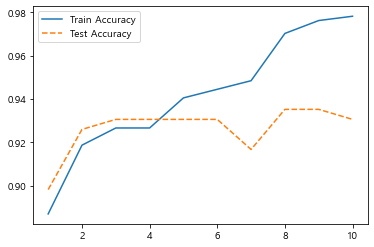

In [199]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

# 최대 깊이 8로 설정

In [202]:
train_accuracy = [] 
test_accuracy = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state=1234, max_depth = 8
                                 , min_samples_split=v_min_samples_split )
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
# 결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["Trainaccuracy"] = train_accuracy
df_accuracy_split["Testaccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,Trainaccuracy,Testaccuracy
0,2,0.970,0.935
1,4,0.970,0.935
2,6,0.968,0.931
3,8,0.966,0.931
4,10,0.966,0.931
5,12,0.966,0.931
6,14,0.966,0.931
7,16,0.966,0.931
8,18,0.966,0.931
9,20,0.966,0.931


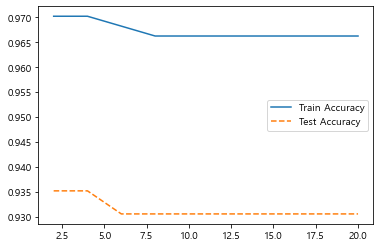

In [203]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

# 분리노드의 최소자료수 4로 설정

In [204]:
train_accuracy =[]
test_accuracy=[]

para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state = 1234, max_depth = 8, min_samples_split=4
                                , min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['Trainaccuracy'] = train_accuracy
df_accuracy_leaf['Testaccuracy'] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,Trainaccuracy,Testaccuracy
0,2,0.964,0.940
1,4,0.964,0.926
2,6,0.938,0.889
3,8,0.935,0.940
4,10,0.923,0.921
5,12,0.923,0.921
6,14,0.923,0.921
7,16,0.923,0.921
8,18,0.919,0.917
9,20,0.905,0.917


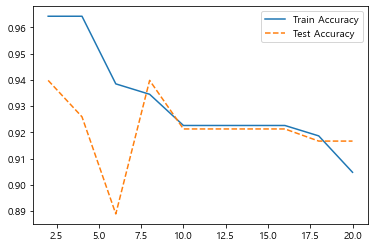

In [205]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

# 잎사귀노드의 최소자료수 8로 설정

In [209]:
tree_final = DecisionTreeClassifier(min_samples_leaf = 8, min_samples_split = 4, max_depth = 8, random_state=1234)
tree_final.fit(df_train_x, df_train_y)
y_pred = tree_final.predict(df_test_x)


print('Accuracy : {0:.3f}'.format(tree_final.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y,y_pred, digits = 3))

Accuracy : 0.940
Confusion matrix : 
[[145   0]
 [ 13  58]]
              precision    recall  f1-score   support

           0      0.918     1.000     0.957       145
           1      1.000     0.817     0.899        71

    accuracy                          0.940       216
   macro avg      0.959     0.908     0.928       216
weighted avg      0.945     0.940     0.938       216



test데이터 기분 정분류율 94% 

정밀도 : 100% / 민감도 : 81.7% / 조화 평균 89.9% 모두 높ㅍ아 좋은 모델이라고 판단된다.

In [210]:
# 변수명
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
11,ROLLING_TEMP_T5,0.714
7,FUR_SZ_TEMP,0.145
0,PT_THK,0.069
12,ROLLING_DESCALING,0.020
5,FUR_HZ_TEMP,0.016
...,...,...
33,SPEC_GL-A,0.000
32,SPEC_COMMON,0.000
31,SPEC_CCS-B,0.000
30,SPEC_BV-EH36-TM,0.000


Text(0, 0.5, '설명변수')

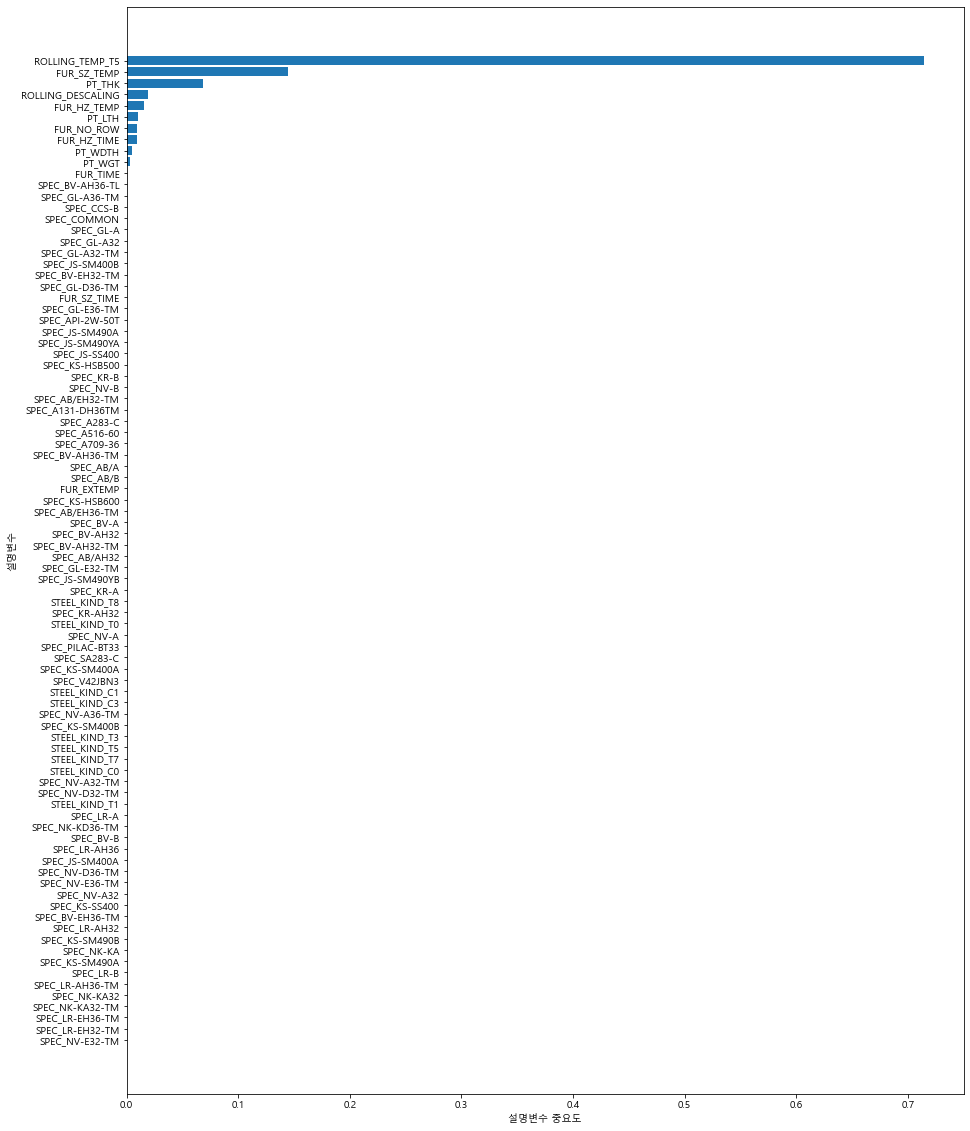

In [212]:
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.figure(figsize = (15,20))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

 ROLLING_TEMP_T5 > FUR_SZ_TEMP > PT_THK > ROLLING_DESCALING > FUR_HZ_TEMP 순으로 중요도가 높다

In [67]:
# GridSearchCV를 이용한 최적 parameter 찾기
estimator =DecisionTreeClassifier()
# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth, "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, min_samples_split=10)

best parameter: 
{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 10}

best score: 
0.917


'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 10  / 정확도 91.7% 그리드서치로 찾은 파라미터 값으로 했을 시 더 정확도가 높다

## 랜덤포레스트

In [213]:
rf_uncustomized = RandomForestClassifier(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(rf_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(rf_uncustomized.score(df_test_x, df_test_y)))

# 과적합 발생

Accuracy on training set : 1.000
Accuracy on test set : 0.921


In [214]:
train_accuracy =[]
test_accuracy=[]
# 트리 수에 변경에 따른 모델 성능
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(random_state = 1234,n_estimators =v_n_estimators )
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainScore'] = train_accuracy
df_accuracy_n['TestScore'] = test_accuracy
df_accuracy_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.994,0.907
1,20,0.994,0.917
2,30,1.000,0.907
3,40,1.000,0.907
4,50,1.000,0.921
5,60,1.000,0.921
6,70,1.000,0.917
7,80,1.000,0.921
8,90,1.000,0.921
9,100,1.000,0.921


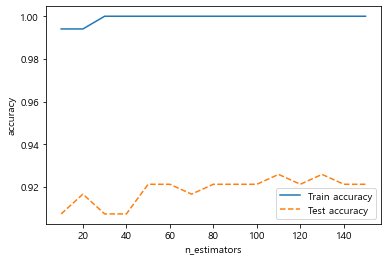

In [215]:
# 모델 설몀력 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = '-', label = 'Train accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle = '--', label = 'Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend()

# 110으로 설정

In [216]:
oob_error = []

for v_n_estimators in range(1, 151):
    rf = RandomForestClassifier(random_state = 1234,n_estimators =v_n_estimators ,oob_score=True)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1- rf.oob_score_)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used 

Text(0.5, 0, 'n_estimators')

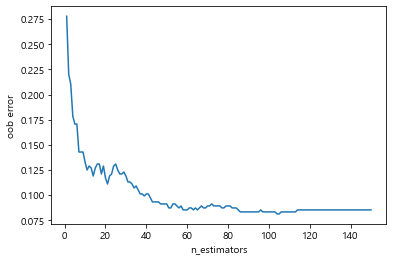

In [217]:
plt.plot(range(1, 151), oob_error)
plt.ylabel('oob error')
plt.xlabel('n_estimators')

# 생성하는 트리수 증가에 따라서 OOB Error 가 감소한다.

In [220]:
train_accuracy= []
test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(random_state=1234, max_depth = v_max_depth,n_estimators = 110)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.683,0.671
1,2,0.879,0.884
2,3,0.895,0.894
3,4,0.917,0.912
4,5,0.923,0.907
5,6,0.923,0.917
6,7,0.937,0.917
7,8,0.952,0.921
8,9,0.962,0.921
9,10,0.970,0.921


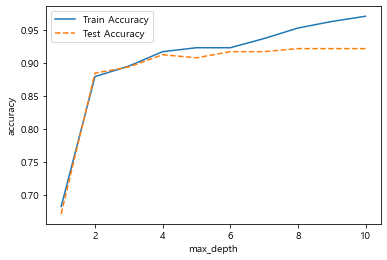

In [221]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('max_depth')
plt.legend()

# 최대깊이가 증가함에따라서 정확도도 증가한다. 6으로 결정

In [222]:
train_accuracy = [] 
test_accuracy = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(random_state=1234, max_depth = 6, n_estimators = 70
                                 , min_samples_split=v_min_samples_split )
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
# 결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["Trainaccuracy"] = train_accuracy
df_accuracy_split["Testaccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,Trainaccuracy,Testaccuracy
0,10,0.921,0.912
1,20,0.915,0.917
2,30,0.917,0.921
3,40,0.917,0.917
4,50,0.919,0.921
5,60,0.919,0.917
6,70,0.917,0.921
7,80,0.919,0.921
8,90,0.917,0.921
9,100,0.917,0.917


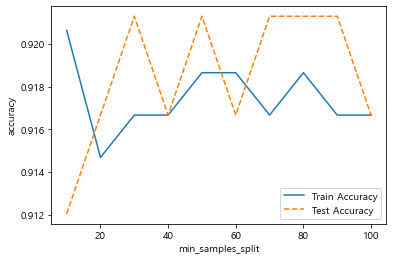

In [223]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('min_samples_split')
plt.legend()

#분리노드의 최소 자료수가 증가에 따라서 정확도가 확실히 증가한다고 볼수 없다. 50으로 설정

In [224]:
train_accuracy =[]
test_accuracy=[]

para_leaf = [n_leaf * 10 for n_leaf in range(1,11)]
# 잎사귀 노드의 최소 자료수 변경에 따른 모델 성능
for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(random_state = 1234, max_depth = 6, min_samples_split=50,n_estimators = 110
                                , min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['Trainaccuracy'] = train_accuracy
df_accuracy_leaf['Testaccuracy'] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,Trainaccuracy,Testaccuracy
0,10,0.907,0.894
1,20,0.879,0.889
2,30,0.873,0.884
3,40,0.867,0.884
4,50,0.861,0.880
5,60,0.851,0.866
6,70,0.843,0.852
7,80,0.792,0.782
8,90,0.728,0.708
9,100,0.683,0.671


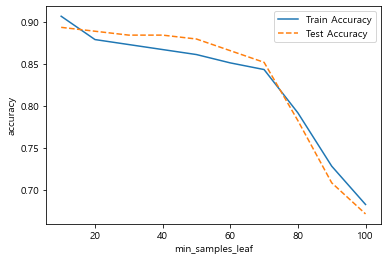

In [225]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('min_samples_leaf')
plt.legend()

# 잎사귀 노드의 최소 자료수가 증가에 따라서 모델의 정확도가 감소하다. 50으로 설정

In [226]:
rf_final = RandomForestClassifier(min_samples_leaf = 50, min_samples_split = 50, max_depth = 6, random_state=1234,
                                n_estimators =110)
rf_final.fit(df_train_x, df_train_y)
y_pred = rf_final.predict(df_test_x)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(rf_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(rf_final.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y,y_pred, digits = 3))

Accuracy on training set : 0.861
Accuracy on test set : 0.880
Confusion matrix : 
[[145   0]
 [ 26  45]]
              precision    recall  f1-score   support

           0      0.848     1.000     0.918       145
           1      1.000     0.634     0.776        71

    accuracy                          0.880       216
   macro avg      0.924     0.817     0.847       216
weighted avg      0.898     0.880     0.871       216



테스트 기준 정분류율은 88%.   정민도 : 100%, 민감도 63.4% 조화평균 77.6%

In [227]:
# 변수명
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
11,ROLLING_TEMP_T5,0.258
7,FUR_SZ_TEMP,0.125
10,FUR_EXTEMP,0.112
1,PT_WDTH,0.096
0,PT_THK,0.083
...,...,...
35,SPEC_GL-A32-TM,0.000
34,SPEC_GL-A32,0.000
33,SPEC_GL-A,0.000
32,SPEC_COMMON,0.000


Text(0, 0.5, '설명변수')

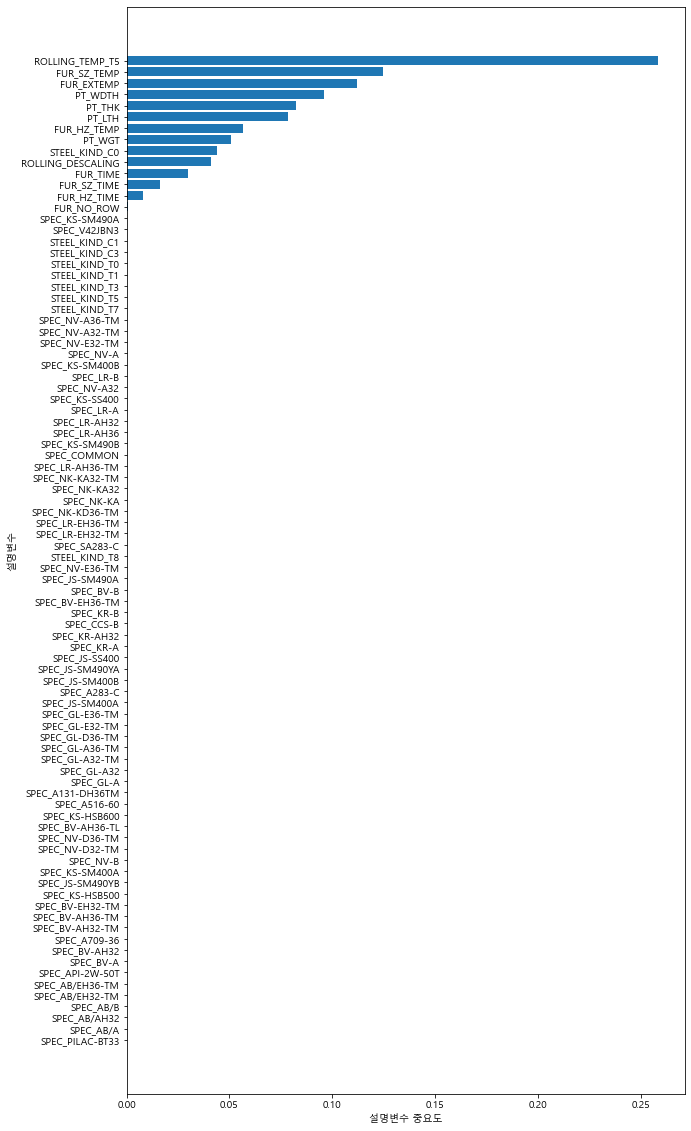

In [228]:
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.figure(figsize = (10,20))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

 ROLLING_TEMP_T5 >FUR_SZ_TEMP > FUR_EXTEMP > PT_WIDTH > PT_THK > PT_LTH > FUR_HZ_TEMP 순으로 중요도가 높다

In [68]:
# GridSearchCV를 이용한 최적 parameter 찾기
estimator = RandomForestClassifier(random_state=1234, n_estimators =100)
# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth,"min_samples_leaf": para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_rf.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, min_samples_split=10)

best parameter: 
{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 10}

best score: 
0.917


그리드 서치를 이용하여 max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 10 를 구함. 정확도가 91.7%로 내가 정한 파라미터로 생성한 모델보다 좋다.

## 그래디언트 부스팅

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
gb_uncustomized = GradientBoostingClassifier(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(gb_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(gb_uncustomized.score(df_test_x, df_test_y)))

# 과적합 발생

Accuracy on training set : 0.984
Accuracy on test set : 0.935


In [32]:
train_accuracy = [] 
test_accuracy = []
# 학습률 변경에 따른 모델 성능
para_lr = [lr*0.1 for lr in range(1, 11)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(random_state=1234, learning_rate = v_learning_rate )
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
# 결과 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["Trainaccuracy"] = train_accuracy
df_accuracy_lr["Testaccuracy"] = test_accuracy
df_accuracy_lr.round(3)

,LearningRate,Trainaccuracy,Testaccuracy
0,0.1,0.984,0.935
1,0.2,0.998,0.912
2,0.3,1.000,0.921
3,0.4,1.000,0.917
4,0.5,1.000,0.921
5,0.6,1.000,0.926
6,0.7,1.000,0.917
7,0.8,1.000,0.912
8,0.9,1.000,0.912
9,1.0,1.000,0.907


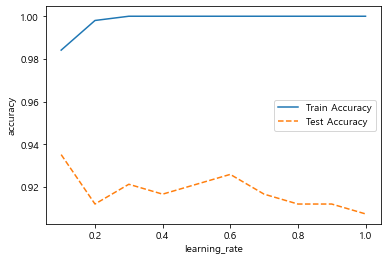

In [33]:
# 모델 설명력 그래프 확인
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('learning_rate')
plt.legend()

#학습률 증가에 따라 모델의 정확도가 떨어졌다가 증가한다.. 0.6로 설정

In [34]:
train_accuracy =[]
test_accuracy=[]
# 트리 수에 변경에 따른 모델 성능
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(random_state = 1234,n_estimators =v_n_estimators, learning_rate = 0.6 )
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['Estimators'] = para_n_tree
df_accuracy_n['TrainScore'] = train_accuracy
df_accuracy_n['TestScore'] = test_accuracy
df_accuracy_n.round(3)

,Estimators,TrainScore,TestScore
0,10,0.986,0.917
1,20,0.996,0.907
2,30,1.000,0.921
3,40,1.000,0.921
4,50,1.000,0.921
5,60,1.000,0.921
6,70,1.000,0.931
7,80,1.000,0.926
8,90,1.000,0.931
9,100,1.000,0.926


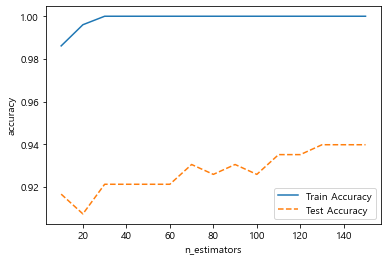

In [35]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend()

#트리가 증가할수록 정확도가 증가한다. 140으로 설정

In [40]:
train_accuracy= []
test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(random_state=1234, max_depth = v_max_depth,n_estimators = 140,learning_rate = 0.6)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.982,0.931
1,2,1.000,0.921
2,3,1.000,0.940
3,4,1.000,0.921
4,5,1.000,0.917
5,6,1.000,0.917
6,7,1.000,0.921
7,8,1.000,0.935
8,9,1.000,0.931
9,10,1.000,0.898


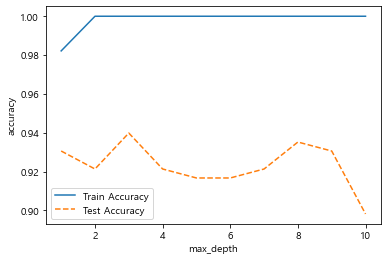

In [41]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('max_depth')
plt.legend()

# 최대깊이가 증가함에따라서 정확도가 증가하다가 train 에과적합이 발생하면서 정확도가 떨어진다 8으로 결정

In [42]:
train_accuracy = [] 
test_accuracy = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(random_state=1234, max_depth = 8, n_estimators = 140,learning_rate = 0.6
                                 , min_samples_split=v_min_samples_split )
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
# 결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["Trainaccuracy"] = train_accuracy
df_accuracy_split["Testaccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,Trainaccuracy,Testaccuracy
0,10,1.0,0.940
1,20,1.0,0.935
2,30,1.0,0.926
3,40,1.0,0.926
4,50,1.0,0.931
5,60,1.0,0.921
6,70,1.0,0.935
7,80,1.0,0.921
8,90,1.0,0.931
9,100,1.0,0.926


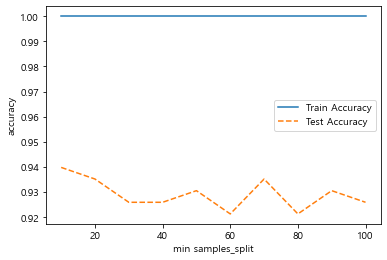

In [43]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('min samples_split')
plt.legend()

#분리노드의 최소 자료수가 증가에 따라서 정확도가 증가하다가도 감소한다. 70으로 설정

In [44]:
train_accuracy =[]
test_accuracy=[]

para_leaf = [n_leaf * 10 for n_leaf in range(1,11)]
# 잎사귀 노드의 최소 자료수 변경에 따른 모델 성능
for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(random_state = 1234, max_depth = 8, min_samples_split=70,n_estimators = 140
                                , learning_rate = 0.6,min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['Trainaccuracy'] = train_accuracy
df_accuracy_leaf['Testaccuracy'] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,Trainaccuracy,Testaccuracy
0,10,1.000,0.944
1,20,1.000,0.912
2,30,1.000,0.907
3,40,1.000,0.921
4,50,1.000,0.907
5,60,1.000,0.926
6,70,1.000,0.903
7,80,1.000,0.907
8,90,1.000,0.921
9,100,0.998,0.926


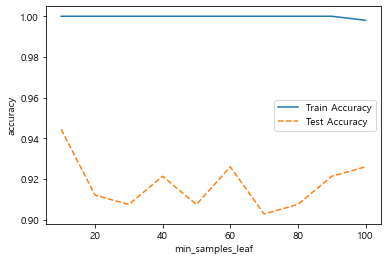

In [45]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('min_samples_leaf')
plt.legend()

# 잎사귀 노드의 최소 자료수가 증가에 따라서 모델의 정확도 감소하다가 증가한다.. 100으로 설정

In [46]:
gb_final = GradientBoostingClassifier(min_samples_leaf = 100, min_samples_split = 70, max_depth = 8, random_state=1234,
                               learning_rate = 0.6, n_estimators =140)
gb_final.fit(df_train_x, df_train_y)
y_pred = gb_final.predict(df_test_x)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y,y_pred, digits = 3))

Accuracy on training set : 0.998
Accuracy on test set : 0.926
Confusion matrix : 
[[142   3]
 [ 13  58]]
              precision    recall  f1-score   support

           0      0.916     0.979     0.947       145
           1      0.951     0.817     0.879        71

    accuracy                          0.926       216
   macro avg      0.933     0.898     0.913       216
weighted avg      0.928     0.926     0.924       216



test 데이터 기준 정분류율은 92.6% / 정확도 95.1%  민감도 81.7% 조화평균 87.9% 높다 좋은 모델이라고 판단된다.

In [47]:
# 변수명
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
11,ROLLING_TEMP_T5,0.738
12,ROLLING_DESCALING,0.065
7,FUR_SZ_TEMP,0.047
8,FUR_SZ_TIME,0.023
0,PT_THK,0.020
...,...,...
35,SPEC_GL-A32-TM,0.000
34,SPEC_GL-A32,0.000
33,SPEC_GL-A,0.000
32,SPEC_COMMON,0.000


Text(0, 0.5, '설명변수')

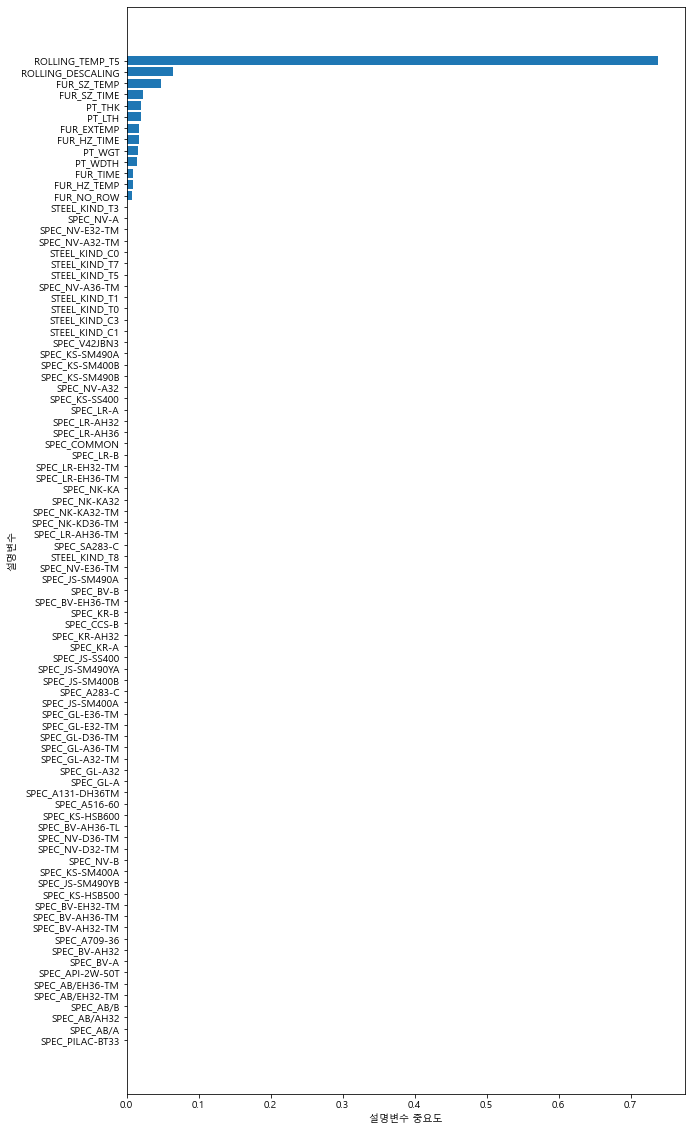

In [48]:
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.figure(figsize = (10,20))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

 ROLLING_TEMP_T5 > ROLLING_DESCALING > FUR_SZ_TEMP > FUR_SZ_TIME >  PT_THK > PT_LTH 순으로 중요도가 높다

## 서포트 벡터 머신

In [51]:
from sklearn.svm import SVC

In [52]:
svm_uncustomized = SVC(random_state = 1234)
svm_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(svm_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(svm_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 0.683
Accuracy on test set : 0.671


In [53]:
train_accuracy= []
test_accuracy = []
# C 규제에 대한 강도 변경 
para_c = [10 ** c for c in range(-2,2)]  # c=[0.01, 0.1, 1 , 10 , 100]

for v_C in para_c:
    svm = SVC(C = v_C, random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.683,0.671
1,0.10,0.683,0.671
2,1.00,0.683,0.671
3,10.00,0.702,0.662


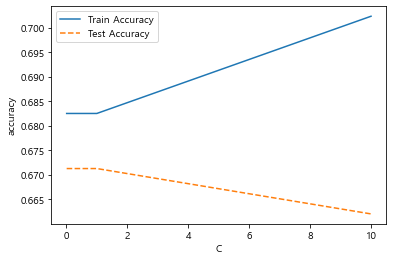

In [54]:
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('C')
plt.legend()

# c가 1이상이면 정확도가 떨어지는 것으로 보인다.

In [55]:
train_accuracy= []
test_accuracy = []
# gamma : 훈련 샘플이 미치는 영향 확인
para_gamma = [10 **gamma for gamma in range(-2,2)]  

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma,C= 0.1, random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.683,0.671
1,0.10,0.683,0.671
2,1.00,0.683,0.671
3,10.00,0.683,0.671


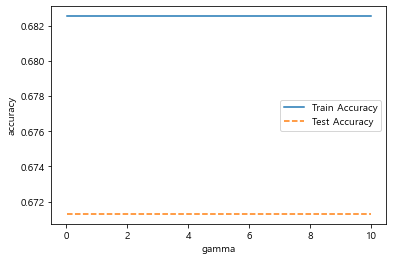

In [56]:
# 모델 설명력 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('gamma')
plt.legend()

# gamma 가 증가해도 아무런 변화가 없다. scale변환이 필요하다고 판단된다.

In [57]:
#변수 이름 저장
v_feature_name = df_train_x.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_dummy)
df_scaled = pd.DataFrame(df_scaled, columns= v_feature_name)
df_scaled.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,SPEC_V42JBN3,STEEL_KIND_C0,STEEL_KIND_C1,STEEL_KIND_C3,STEEL_KIND_T0,STEEL_KIND_T1,STEEL_KIND_T3,STEEL_KIND_T5,STEEL_KIND_T7,STEEL_KIND_T8
0,0.155812,1.738951,-1.390441,-1.103810,-0.994460,-0.543782,0.767342,-0.949149,-0.626453,-0.409268,...,-0.074744,-1.522489,-0.037294,-0.099084,-0.150756,6.244998,-0.052778,-0.252023,-0.226042,-0.389872
1,0.155812,1.738951,-1.390441,-1.103810,1.005571,-0.543782,0.932981,-0.835252,-0.856618,-0.387221,...,-0.074744,-1.522489,-0.037294,-0.099084,-0.150756,6.244998,-0.052778,-0.252023,-0.226042,-0.389872
2,0.209106,1.568896,-1.095771,-0.944112,-0.994460,-1.263141,0.767342,-1.632537,-0.779897,-0.409268,...,-0.074744,-1.522489,-0.037294,-0.099084,-0.150756,-0.160128,-0.052778,-0.252023,-0.226042,2.564946
3,0.209106,1.568896,-1.095771,-0.944112,1.005571,-0.160124,1.015800,-1.290843,-0.281206,0.340311,...,-0.074744,-1.522489,-0.037294,-0.099084,-0.150756,-0.160128,-0.052778,-0.252023,-0.226042,2.564946
4,0.473482,0.562094,-1.518889,-1.174562,-0.994460,-0.735611,1.264257,-1.233894,-1.048422,0.296219,...,-0.074744,-1.522489,-0.037294,-0.099084,-0.150756,-0.160128,-0.052778,-0.252023,-0.226042,2.564946


In [58]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size= 0.3, random_state=1234)
print('train data X size : {}'.format(df_scaled_train_x.shape))
print('test data X size : {}'.format(df_scaled_test_x.shape))

train data X size : (504, 88)
test data X size : (216, 88)


In [59]:
svm_scaled = SVC(random_state = 1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(svm_scaled.score(df_scaled_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(svm_scaled.score(df_scaled_test_x, df_test_y)))

# scale변환 후 train 과 test 모두 정확도가 증가했다.

Accuracy on training set : 0.847
Accuracy on test set : 0.792


In [60]:
train_accuracy= []
test_accuracy = []
# C 규제에 대한 강도 변경
para_c = [10 ** c for c in range(-2,2)]  # c=[0.01, 0.1, 1 , 10 , 100]

for v_C in para_c:
    svm = SVC(C = v_C, random_state=1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.683,0.671
1,0.10,0.688,0.690
2,1.00,0.847,0.792
3,10.00,0.925,0.810


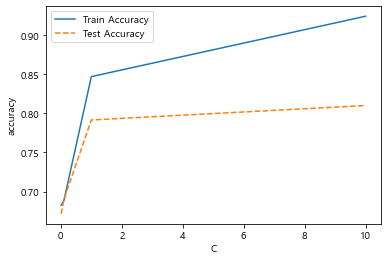

In [61]:
# 모델 설명력 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('C')
plt.legend()

# c가 증가할수록 정확도가 증가한다. 1로 설정

In [62]:
train_accuracy= []
test_accuracy = []
# scale 후 , gamma 규제 
para_gamma = [0.01, 0.05, 0.1, 0.2]  # c=[0.01, 0.1, 1 , 10 , 100]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma,C=1, random_state=1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.845,0.792
1,0.05,0.887,0.782
2,0.10,0.923,0.759
3,0.20,0.942,0.759


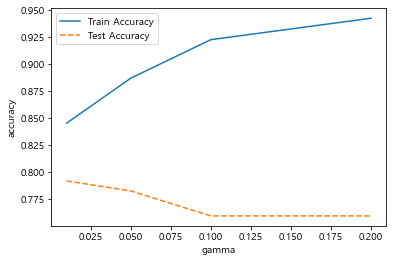

In [63]:
# 모델 설명력 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('gamma')
plt.legend()

# gamma가 증가할수록 정확도가 떨어디고 1이후로는 과적합이 보인다. 0.025로 설정

In [64]:
svc_final = SVC(gamma = 0.25,C=1,  random_state=1234)
svc_final.fit(df_scaled_train_x, df_train_y)
y_pred = svc_final.predict(df_scaled_test_x)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(svc_final.score(df_scaled_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(svc_final.score(df_scaled_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y,y_pred, digits = 3))

Accuracy on training set : 0.946
Accuracy on test set : 0.759
Confusion matrix : 
[[139   6]
 [ 46  25]]
              precision    recall  f1-score   support

           0      0.751     0.959     0.842       145
           1      0.806     0.352     0.490        71

    accuracy                          0.759       216
   macro avg      0.779     0.655     0.666       216
weighted avg      0.769     0.759     0.727       216



test기준 정분류율은 75.9% 이며  정밀도는 80.6% 민감도는 35.2%로 낮은 편이다. 조화평균도 49%로 낮은 편이다.

In [65]:
# GridSearchCV를 이용한 최적 parameter 찾기

estimator = SVC(random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid = {"C": para_c,"gamma": para_gamma}
# 설명력이 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_rf.fit(df_scaled_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
SVC(C=10, gamma=0.01, random_state=1234)

best parameter: 
{'C': 10, 'gamma': 0.01}

best score: 
0.81


그리드 서치를 이용해서 구한 c=10, gamma = 0.01 정확도는 81%이다. 내가 설정한 파라미터 값보다 훨씬 좋은 정확도가 나왔다.

# 모델평가

In [70]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

In [122]:
model = ['DF', 'RF', 'GB', 'SVM']

train_accuracy=[]
test_accuracy=[]
model_auc=[]

model_precision=[]
model_recall=[]
model_f1_score=[]

## 의사결정나무

In [123]:
dt_model = DecisionTreeClassifier(min_samples_leaf = 10, min_samples_split = 10, max_depth = 2, random_state=1234)
dt_model.fit(df_train_x, df_train_y)

train_accuracy.append(dt_model.score(df_train_x, df_train_y))
test_accuracy.append(dt_model.score(df_test_x, df_test_y))

y_pred = dt_model.predict(df_test_x)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc= auc(fpr, tpr)

model_auc.append(roc_auc)

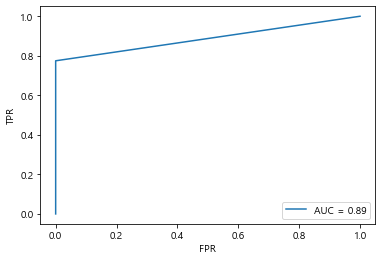

In [124]:
plt.plot(fpr, tpr, label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [125]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))
model_f1_score.append(f1_score(df_test_y, y_pred))

AUC의 값이 높을수록 좋은 모델이라고 할 수 있다.

의사결정나무의 AUC는 0.89이다. 정확한 모델이라고 판단된다.

## 랜덤포레스트

In [126]:
rf_model = RandomForestClassifier(min_samples_leaf = 10, min_samples_split = 10, max_depth = 2, random_state=1234, n_estimators = 100)
rf_model.fit(df_train_x, df_train_y)

train_accuracy.append(rf_model.score(df_train_x, df_train_y))
test_accuracy.append(rf_model.score(df_test_x, df_test_y))

y_pred = rf_model.predict(df_test_x)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc= auc(fpr, tpr)

model_auc.append(roc_auc)

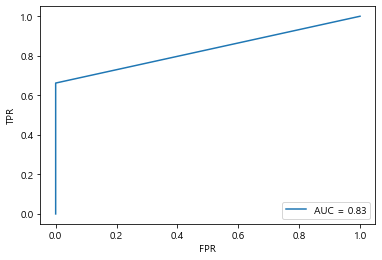

In [127]:
plt.plot(fpr, tpr, label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [128]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))
model_f1_score.append(f1_score(df_test_y, y_pred))

랜덤포레스트의 AUC는 0.83이다. 정확한 모델이라고 판단된다.

## 그래디언트 부스팅

In [129]:
gb_model =GradientBoostingClassifier(min_samples_leaf = 100, min_samples_split = 70, max_depth = 8, random_state=1234,
                               learning_rate = 0.6, n_estimators =140)
gb_model.fit(df_train_x, df_train_y)

train_accuracy.append(gb_model.score(df_train_x, df_train_y))
test_accuracy.append(gb_model.score(df_test_x, df_test_y))

y_pred = gb_model.predict(df_test_x)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc= auc(fpr, tpr)

model_auc.append(roc_auc)

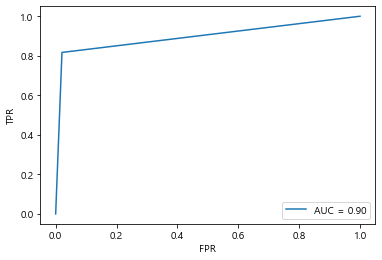

In [130]:
plt.plot(fpr, tpr, label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [131]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))
model_f1_score.append(f1_score(df_test_y, y_pred))

그래디언트 부스팅의 AUC는 0.90이다. 정확한 모델이라고 판단된다.

## 서포트 벡터 머신

In [132]:
svc_model =SVC(gamma = 0.25,C=1,  random_state=1234)
svc_model.fit(df_train_x, df_train_y)

train_accuracy.append(svc_model.score(df_train_x, df_train_y))
test_accuracy.append(svc_model.score(df_test_x, df_test_y))

y_pred = svc_model.predict(df_test_x)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc= auc(fpr, tpr)

model_auc.append(roc_auc)

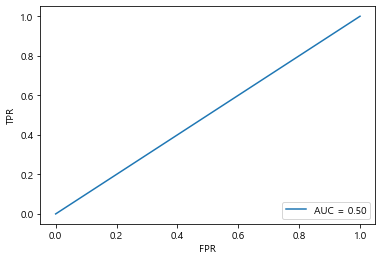

In [133]:
plt.plot(fpr, tpr, label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [134]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))
model_f1_score.append(f1_score(df_test_y, y_pred))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


서포트 벡터머신 의 AUC는 0.5이다. 정확하지 않은 모델이라고 판단된다.

In [135]:
df_eval = pd.DataFrame(index = model)
df_eval['TrainAccuracy'] = train_accuracy
df_eval['TestAccuracy'] = test_accuracy
df_eval['AUC'] = model_auc
df_eval['Precision'] = model_precision
df_eval['Recall'] = model_recall
df_eval['F1Score'] = model_f1_score
df_eval.round(3)

,TrainAccuracy,TestAccuracy,AUC,Precision,Recall,F1Score
DF,0.919,0.926,0.887,1.000,0.775,0.873
RF,0.879,0.889,0.831,1.000,0.662,0.797
GB,0.998,0.926,0.898,0.951,0.817,0.879
SVM,1.000,0.671,0.500,0.000,0.000,0.000


AUC는 그래디언트 부스팅 > 의사결정나무 > 랜덤포레스트 > 서포트벡터머신

TEST의 정확성은 그래디언트 부스팅 = 의사결정나무 > 랜덤포레스트 > 서포트 벡터머신

F1score는 그래디언트 부스팅 = 의사결정나무 > 랜덤포레스트 > 서포트 벡터머신

민감도는 그래디언트 부스팅 > 의사결정나무 > 랜덤포레스트 > 서포트 벡터머신

즉, 그래디언트 부스팅의 모델이 가장 적절하고 좋은 모델이라고 판단됩니다.

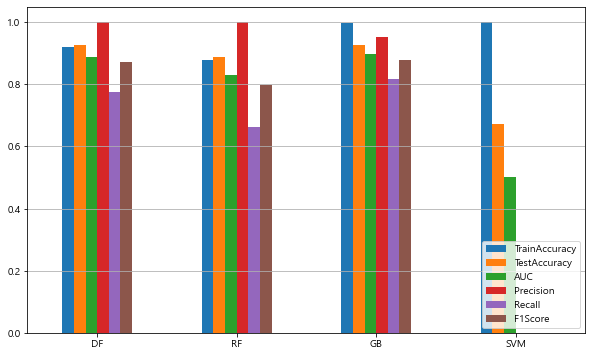

In [136]:
df_eval.plot.bar(rot=0, figsize=(10,6))
plt.legend(loc= 'lower right')
plt.grid(axis ='y')